# Hack for Nature : Hackathon

**Objectif du hackathon:** Comptabilisé le nombre d'arbre dans un périmètre donné (une ville de préférence, ici la ville de Marseille).

In [ ]:
import matplotlib.pyplot as plt
from deepforest import utilities
from deepforest import main

import pandas as pd
import glob
import os

## Récupération des données
---

Les datasets:
- Dataset 1: Dataset de l'équipe gérant le projet avant (Nous avons déjà le modèle entrainé),
- Dataset 2: Dataset des données IGN labalisées durant le hackathon,  
- Dataset 3: Les deux datasets,

In [69]:
def generate_csv_training(path_dataset = "../data/",
                          csv_name = 'csv_training.csv') -> tuple:
    """
    Génère le fichier csv pour le training du model. Le chemin du dataset se compose de deux sous dossier :
    - un nommée : data_images => Contient toutes les images 
    - un autre nommée : data_xml => Contient toutes annotations des bboxe des prédictions pour chaque image un fichier .xml.

    Attention les fichier sont liée par leur nom, par exemple : name.png à son compagnion name.xml.

    Args:
        path_dataset (str, optional): [chemin du dataset contenant les deux sous dossiers]. Defaults to "../data/".
        csv_name (str, optional): [le nom du fichier de train à donnée à l'algorithme]. Defaults to 'csv_training.csv'.

    Returns:
        tuple: [Un dataframe panda et le path du csv]
    """

    path_images_csv = path_dataset+'data_images/'
    path_xml = path_dataset+'data_xml/'

    path_xml_list = glob.glob(path_xml+'*.xml')
    liste = []
    for path_to_file in path_xml_list:
        liste.append(utilities.xml_to_annotations(path_to_file))
        
    df = pd.concat(liste).reset_index(drop = True)
    df['image_path'] = df['image_path'].apply(lambda x: x + '.png')
    csv = os.path.join("../data/", csv_name)
    df.to_csv(csv, index=False)
    return df, csv

df, csv = generate_csv_training("../data/TestSet/")

## Trainning model
---

L'entrainnement du modèle se fait selon une stratégie de "data augmentation" en entrainnant sur des arbres de ville au lieu d'arbre de foret canadienne comme l'ait fait le modèle actuel. Nous voulons comparer si le modèle ré-entrainné est plus performant et sur quoi pour la tache que nous voulons résoudre. Le package utilisé est deep forest, il recommande de faire cette stratégie, également l'entrainnement à été fait à un niveau de zoom précis et une hauteur et largeur d'image précise. 

Par problème de temps nous avons fait uniquement 4 epoch pour les dataset 2 et 3. 

Date documentation package "Deep Forest": 17/10/2021  
Lien: https://deepforest.readthedocs.io/en/latest/better.html  

In [ ]:
###################################################################
###################################################################
####################      Idée d'avenir    ########################
###################################################################
###################################################################

# Documentation:
# https://deepforest.readthedocs.io/en/latest/ConfigurationFile.html
# https://deepforest.readthedocs.io/en/latest/source/deepforest.html

# from torch.optim import Adam
# from torch.optim.lr_scheduler import ReduceLROnPlateau

# def configure_optimizers(self):
#     optimizer = Adam(model.parameters(), lr=0.01, momentum=0.9)
#     return {
#         "optimizer": optimizer,
#         "lr_scheduler": {
#             "scheduler": ReduceLROnPlateau(optimizer, 'min'),
#             "monitor": "metric_to_track",
#         },
#     }


In [120]:
liModel = []

for data_set_path in ["../data/Dataset2/",  "../data/Dataset3/"]:

    model = main.deepforest()
    model.use_release()
    
    df, csv = generate_csv_training(data_set_path)
    annotations_file = "../data/csv_training.csv"
    
    # model.config["score_thresh"] = 0.3
    # model.config["train"]["lr"] = 0.001
    # model.config["train"]["batch_size"] = 3
    # model.config["save-snapshot"] = False

    model.config["epochs"] = 4
    model.config["train"]["fast_dev_run"] = False
    model.config["train"]["csv_file"] = annotations_file
    model.config["train"]["root_dir"] = os.path.dirname(data_set_path+"data_images/")
    model.create_trainer()
    model.trainer.fit(model)

    model.trainer.save_checkpoint("{}/checkpoint.pl".format(data_set_path.split("/")[-2]))

    liModel.append(model)

Reading config file: C:\Users\rmeut\anaconda3\envs\Hackathon\lib\site-packages\deepforest\data\deepforest_config.yml
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name  | Type      | Params
------------------------------------
0 | model | RetinaNet | 32.1 M
------------------------------------
31.9 M    Trainable params
222 K     Non-trainable params
32.1 M    Total params
128.592   Total estimated model params size (MB)


C:\Users\rmeut\anaconda3\envs\Hackathon\lib\site-packages\pytorch_lightning\trainer\data_loading.py:382: UserWarning: One of given dataloaders is None and it will be skipped.
  rank_zero_warn("One of given dataloaders is None and it will be skipped.")
C:\Users\rmeut\anaconda3\envs\Hackathon\lib\site-packages\pytorch_lightning\trainer\data_loading.py:106: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Epoch 0: 100%|██████████| 118/118 [11:54<00:00,  6.01s/it, loss=0.789]
Reading config file: C:\Users\rmeut\anaconda3\envs\Hackathon\lib\site-packages\deepforest\data\deepforest_config.yml
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name  | Type      | Params
------------------------------------
0 | model | RetinaNet | 32.1 M
------------------------------------
31.9 M    Trainable params
222 K     Non-trainable params
32.1 M    Total params
128.592   Total estimated model params size (MB)


Epoch 0: 100%|██████████| 94/94 [09:16<00:00,  5.85s/it, loss=0.766]


## Evaluate model
---

In [160]:
# %%time
# data_set_path = "../data/TestSet/"
# df, csv = generate_csv_training(data_set_path)
# root_dir = os.path.dirname("../data/TestSet/data_images/")

model = main.deepforest()
model.use_release()
liModel.append(model)

Res = dict()

for idx, mod in enumerate(liModel):
    for treshold in [0.3, 0.5, 0.7]:
        results = model.evaluate(csv, root_dir, iou_threshold=0.5)
        Res["result-dataset"+str(idx)+"-"+str(treshold)] = results

0.7449392712550608
dict_keys(['results', 'box_precision', 'box_recall', 'class_recall'])
0.7089929616531446 0.30823600101245924


0.5853461977520548

In [188]:
df = pd.DataFrame(Test).T
df.index = df[["box_precision", "box_recall"]].index.map(lambda x: " ".join(x.split("-")[1:]))

df["accuracy"] = df.results.map(lambda x: x["match"].sum()/x["match"].count())
df["IoU"] = df.results.map(lambda x: x["IoU"].mean())
dfResult = df.drop(columns=["results", "class_recall"])


In [199]:
dfResult

box_precision box_recall  accuracy       IoU
dataset3 0.3      0.386193   0.906815  0.919028  0.585346
dataset3 0.7      0.133294   0.296033  0.311741  0.585346
dataset2 0.5      0.420288    0.65285  0.676113  0.538907
dataset2 0.3      0.532298   0.841979  0.866397  0.538907
Main 0.3          0.312465    0.44653  0.522267  0.295906
Main 0.5          0.160624   0.221258  0.246964  0.295906
Main 0.7          0.029851   0.043105  0.040486  0.295906
dataset3 0.5      0.308236   0.708993  0.744939  0.585346

Le meilleur modèle est celui du dataset 2 avec 0.3 de threshold pour la métrique IuO on obtient: 
- Precision : 0.532298	
- Recall :    0.841979	
- Accuracy :  0.866397	
- IoU :       0.538907

## Save model
---

In [158]:
# model.trainer.save_checkpoint("finalModel/checkpoint.pl")
model = main.deepforest.load_from_checkpoint("Dataset3/checkpoint.pl")
model.score_thresh = 0.3

Reading config file: C:\Users\rmeut\anaconda3\envs\Hackathon\lib\site-packages\deepforest\data\deepforest_config.yml


## Prédiction
---

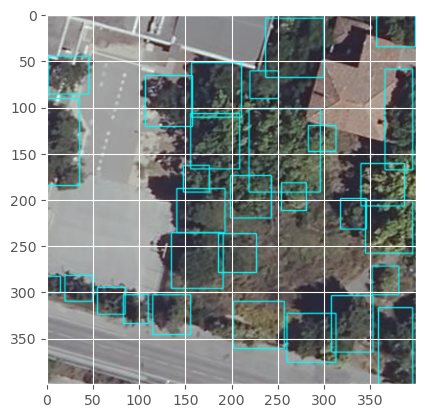

In [152]:
def predictImage(
    imagePath: str):
    """
        Prediction and show each bbox per image,
    Args:
        imagePath (str): Path of image, 
    """
    
    boxes = liModel[0].predict_image(path=imagePath, return_plot = True)
    plt.imshow(boxes[:,:,::-1])
    plt.show()

image_path = "..\data\TestSet\data_images\\2bf74a25-image20.png"
predictImage(image_path)